In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df= pd.read_csv("C:/Users/elias/Downloads/cov/covid_19_data.csv")
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
df.shape

(59759, 8)

In [4]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
59754,59755,07/08/2020,Zacatecas,Mexico,2020-07-09 04:34:23,1212.0,128.0,791.0
59755,59756,07/08/2020,Zakarpattia Oblast,Ukraine,2020-07-09 04:34:23,3533.0,121.0,1117.0
59756,59757,07/08/2020,Zaporizhia Oblast,Ukraine,2020-07-09 04:34:23,599.0,18.0,464.0
59757,59758,07/08/2020,Zhejiang,Mainland China,2020-07-09 04:34:23,1269.0,1.0,1267.0
59758,59759,07/08/2020,Zhytomyr Oblast,Ukraine,2020-07-09 04:34:23,1484.0,32.0,1061.0


### Data Cleaning and Preprocessing 

In [ ]:
#Check how much null value is there

In [5]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     22409
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [ ]:
# ND: Error detected. We have 22409 Null value. It should removed or fill with median

In [6]:
df = df.fillna(df.median().iloc[0])
df.isna().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

### ExploratoryData Analysis (EDA)

In [7]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
59754,59755,07/08/2020,Zacatecas,Mexico,2020-07-09 04:34:23,1212.0,128.0,791.0
59755,59756,07/08/2020,Zakarpattia Oblast,Ukraine,2020-07-09 04:34:23,3533.0,121.0,1117.0
59756,59757,07/08/2020,Zaporizhia Oblast,Ukraine,2020-07-09 04:34:23,599.0,18.0,464.0
59757,59758,07/08/2020,Zhejiang,Mainland China,2020-07-09 04:34:23,1269.0,1.0,1267.0


#### Finding the outlier from the dataset 

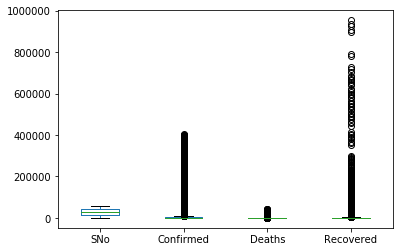

In [9]:
df.plot(kind='box')
plt.show()

In [ ]:
#NB: we have some outlier which we can see on top of the Recovered columns 

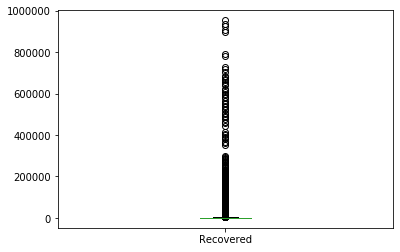

In [19]:
df['Recovered'].plot(kind='box')
plt.show()

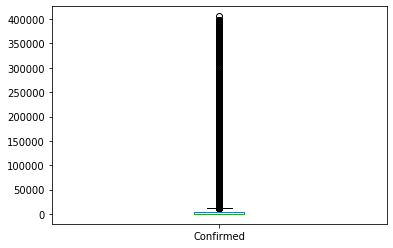

In [20]:
df['Confirmed'].plot(kind='box')
plt.show()

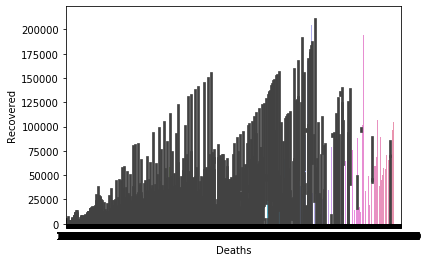

In [21]:
plot = sns.barplot(x=df["Deaths"], 
                   y=df["Recovered"])

#### Let's see the distribution plot 

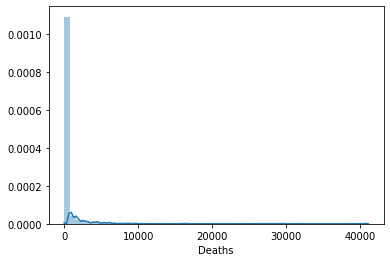

In [22]:
plot = sns.distplot(df["Deaths"],
                    hist=True)

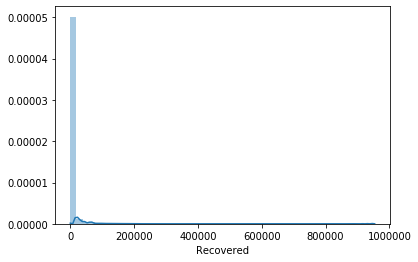

In [23]:
plot = sns.distplot(df["Recovered"],
                    hist=True)

#### Label encoding 

In [27]:
cat_cols = ['Province/State','Country/Region']

for col in cat_cols:
    df[col] = df[col].astype('category')
    #print(col,'---->', dict(enumerate(df[col].cat.categories)))
    df[col] = df[col].cat.codes
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,25,124,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,60,124,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,123,124,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,188,124,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,194,124,1/22/2020 17:00,0.0,0.0,0.0


In [50]:
df['ObservationDate']=df['ObservationDate'].astype(str) 

#### Define the independent and dependent features 

In [56]:
X= df.drop(['SNo','Province/State','ObservationDate','Last Update', 'Deaths'], axis='columns')
y= df['Deaths']

In [57]:
X

,Country/Region,Confirmed,Recovered
0,124,1.0,0.0
1,124,14.0,0.0
2,124,6.0,0.0
3,124,1.0,0.0
4,124,0.0,0.0
...,...,...,...
59754,134,1212.0,791.0
59755,210,3533.0,1117.0
59756,210,599.0,464.0
59757,124,1269.0,1267.0


#### Train test and split 

In [58]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.8, random_state=4)

#### Apply LinearRegression

In [63]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
linreg.score(X_test, y_test)

0.6550160497150064

#### Classification Matrix 

In [68]:
print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = linreg.score(X_test,y_test)
print('AccuracyII:',accuracy*100,'%')
print('R2:', r2_score(y_test, predictions))

Coefficients: [-0.43227562  0.06649643 -0.00974459]
Intercept: -16.911072516315357
MAE: 528.4518490629183
MSE: 6289290.212642236
RMSE: 2507.8457314281186
AccuracyII: 65.50160497150064 %
R2: -0.021537800325570622


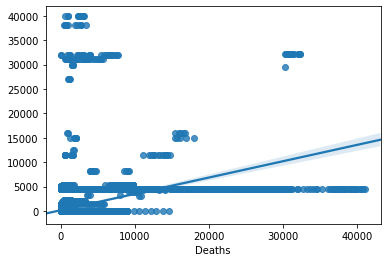

In [69]:
sns.regplot(x=y_test, y=predictions)

In [ ]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

#actual vs predicted plot
df2.plot(kind='bar',figsize=(60,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()